<a href="https://colab.research.google.com/github/priyanshgupta1998/All_codes/blob/master/pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=dvOnYLDg8_Y&list=PLQVvvaa0QuDdc2k5dwtDTyT9aCja0on8j

In [0]:
import torch
import torch.nn.functional as functional
import matplotlib.pyplot as plt


x = torch.randn(200,1) #Generate random data
y = x.pow(4) + 0.05*torch.rand(x.size()) #add some noise to the output
epoch = 1500
learning_rate = 0.05


In [0]:

#Manual Method. Involves building the layer architecture:

class Net(torch.nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        '''
        Intialize 2 layer neural net
        '''
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_input,n_hidden)
        self.output = torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,input):
        '''
        input=> The input to compute forward prop on
        returns => output after forward prop
        '''
        hidden = functional.relu(self.hidden(input))
        output = self.output(hidden)
        return output

In [7]:
net = Net(1,15,1)
print(net)


Net(
  (hidden): Linear(in_features=1, out_features=15, bias=True)
  (output): Linear(in_features=15, out_features=1, bias=True)
)


In [0]:
lossFunc = torch.nn.MSELoss()  #Mean Squared Error Function
for i in range(epoch):
    '''
    To cange the network used(net or seq_net), you just need to replace one network with another
    '''
    output = net(x) #forward Prop
    loss = lossFunc(output,y)
    net.zero_grad()  # Buffer / for garbage
    loss.backward()  # Back propagation
    #Manual Updation of parameters
    
    for f in net.parameters():
        f.data.sub_(f.grad.data*learning_rate)
    #print(i , 'th loss ' , loss.squeeze())

In [9]:
# Sequential architecture alllows us to build the nueral network without creating the class

#Antoher method using Sequential function. Much less work
seq_net = torch.nn.Sequential(torch.nn.Linear(1,15),
                              torch.nn.ReLU(),
                              torch.nn.Linear(15,1)
                             )

print(seq_net) #This should be same as net

Sequential(
  (0): Linear(in_features=1, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
)


In [10]:
lossFunc = torch.nn.MSELoss()  #Mean Squared Error Function

optim = torch.optim.SGD(seq_net.parameters(),lr=0.0611,momentum=0.9) #SGD optimizer with momentum

for i in range(epoch):
    '''
    To cange the network used(net or seq_net), you just need to replace one network with another
    '''
    output = seq_net(x) #forward Prop
    loss = lossFunc(output,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (i+1)%70==0 :
        print(str((i+1))+'th loss',loss.squeeze())

70th loss tensor(0.0442, grad_fn=<SqueezeBackward0>)
140th loss tensor(0.0275, grad_fn=<SqueezeBackward0>)
210th loss tensor(0.0225, grad_fn=<SqueezeBackward0>)
280th loss tensor(0.0205, grad_fn=<SqueezeBackward0>)
350th loss tensor(0.0175, grad_fn=<SqueezeBackward0>)
420th loss tensor(0.0145, grad_fn=<SqueezeBackward0>)
490th loss tensor(0.0134, grad_fn=<SqueezeBackward0>)
560th loss tensor(0.0122, grad_fn=<SqueezeBackward0>)
630th loss tensor(0.0117, grad_fn=<SqueezeBackward0>)
700th loss tensor(0.0113, grad_fn=<SqueezeBackward0>)
770th loss tensor(0.0110, grad_fn=<SqueezeBackward0>)
840th loss tensor(0.0108, grad_fn=<SqueezeBackward0>)
910th loss tensor(0.0105, grad_fn=<SqueezeBackward0>)
980th loss tensor(0.0103, grad_fn=<SqueezeBackward0>)
1050th loss tensor(0.0101, grad_fn=<SqueezeBackward0>)
1120th loss tensor(0.0099, grad_fn=<SqueezeBackward0>)
1190th loss tensor(0.0097, grad_fn=<SqueezeBackward0>)
1260th loss tensor(0.0095, grad_fn=<SqueezeBackward0>)
1330th loss tensor(0.0094

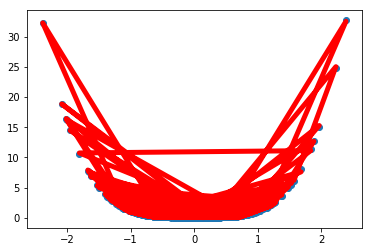

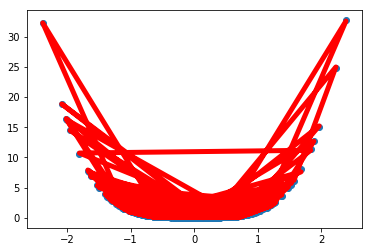

In [16]:

optim = torch.optim.SGD(seq_net.parameters(),lr=0.0611,momentum=0.9) #SGD optimizer with momentum

for i in range(epoch):
    '''
    To cange the network used(net or seq_net), you just need to replace one network with another
    '''
    output = seq_net(x) #forward Prop
    loss = lossFunc(output,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if i % 800 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), output.data.numpy(), 'r-', lw=5)
        #plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()



---



---



---



---



---



---



---



---



In [25]:
import sklearn.datasets as datasets
import torch
import torch.nn.functional as functional
import matplotlib.pyplot as plt 

'''
Make fake classification data for us to train upon
#Samples = 200
#features = 10
#classes = 2
'''
data = datasets.make_classification(n_samples=4,n_features=10,n_classes=2)

data

(array([[ 1.13457948,  0.52942147,  0.7907899 , -0.63567304, -0.05616677,
         -1.3109389 ,  0.08543149,  1.14172079, -0.54421518,  0.01146782],
        [-1.39776757, -1.90931115, -1.30218541,  0.22765798, -0.5183545 ,
         -1.45867076,  0.49423023, -1.25878463,  1.53972957, -0.02755132],
        [ 0.13652363,  0.90723546,  0.31522187,  0.43425442,  2.03777948,
          0.34582661, -0.23537517,  1.00760174, -0.64878794,  0.98456136],
        [ 1.08316801, -1.24256063,  0.29892765,  0.83022861, -0.71941132,
          0.74612951,  1.56421872, -1.8414959 ,  0.68918467, -0.83417941]]),
 array([1, 0, 0, 1]))

torch.Size([200, 10]) 
 torch.Size([200])
Net(
  (hidden): Linear(in_features=10, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=2, bias=True)
  (3): Sigmoid()
)


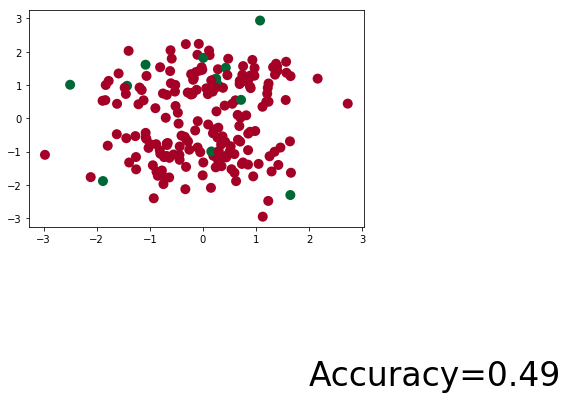

1400th loss tensor(0.3587, grad_fn=<SqueezeBackward0>)


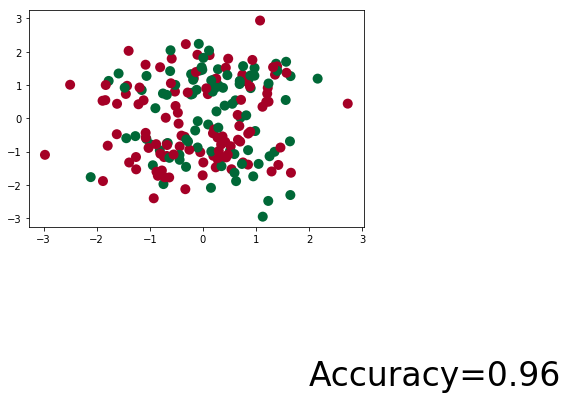

In [27]:

data = datasets.make_classification(n_samples=200,n_features=10,n_classes=2)

X = torch.from_numpy(data[0]).float()
Y = torch.from_numpy(data[1]).long()
epoch = 1500
print(X.shape,'\n',Y.shape)
'''
Let's build two neural nets.First, by implementing the entire network architecture manually and
then by using the inbuilt Sequential() function 
'''
class Net(torch.nn.Module):
    def __init__(self,n_features,n_hidden,n_classes):
        '''
        Intialize 2 layer neural net
        '''        
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_features,n_hidden)
        self.output = torch.nn.Linear(n_hidden,n_classes)
    
    def forward(self,input):
        '''
        input=> The input to compute forward prop on
        returns => output after forward prop
        '''   
        hidden = functional.relu(self.hidden(input))
        output = functional.sigmoid(self.output(hidden))

net = Net(10,20,2)
print(net)

#Antoher method using Sequential function. Requires much less work
seq_net = torch.nn.Sequential(torch.nn.Linear(10,20),
                              torch.nn.ReLU(),
                              torch.nn.Linear(20,2),
                              torch.nn.Sigmoid()
                             )
print(seq_net)

lossFunc = torch.nn.CrossEntropyLoss()
optim = torch.optim.SGD(seq_net.parameters(),lr=0.0711,momentum=0.9)

plt.ion()

for i in range(epoch):
    '''
    To cange the network used(net or seq_net), you just need to replace one network name
     with another
    '''
    output = seq_net(X)
    loss = lossFunc(output,Y)
    #Manual Updation of parameters
    '''
    seq_net.zero_grad()
    for f in seq_net.parameters():
        f.data.sub_(f.grad.data*learning_rate)
    '''

    optim.zero_grad()
    loss.backward()
    optim.step()

    if (i+1)%1400==0 :
        print(str((i+1))+'th loss',loss.squeeze())
    
    if i %1400 == 0:
        # plot the data to verify the learning process
        plt.cla()
        prediction = torch.max(output, 1)[1]
        predicted_y = prediction.data.numpy().squeeze()
        target_y = Y.data.numpy()
        plt.scatter(X.data.numpy()[:, 0], X.data.numpy()[:, 1], c=predicted_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(predicted_y == target_y)/200.
        plt.text(2, -8, 'Accuracy=%.2f' % accuracy, fontdict={'size': 33, 'color':  'black'})
        plt.pause(0.05)

plt.ioff()
plt.show()